In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# 1. Data Loading and Exploration: 

In [2]:
# a. Load the Titanic dataset into a Pandas DataFrame.
df = pd.read_csv("train.csv")

In [3]:
# b. Display the first few rows of the dataset.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# c. Check for missing values in the dataset and handle them appropriately.
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df.drop('Cabin', axis=1, inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

In [6]:
# d. Calculate basic summary statistics for the numerical columns (e.g., age, fare)
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   13.002015    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   29.699118    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


# 2. Data Visualization with Matplotlib:

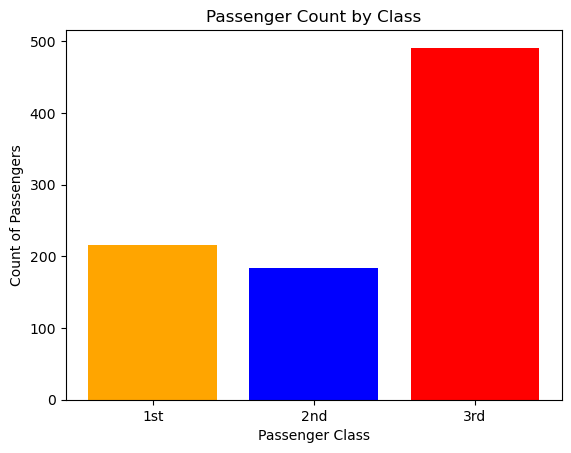

In [7]:
# a. Create a bar chart showing the count of passengers in each passenger class (1st, 2nd, 3rd).
fig, ax = plt.subplots()
counts = df['Pclass'].value_counts().sort_index()
colors = ['orange', 'blue', 'red']
ax.bar(counts.index,counts.values, color = colors)
ax.set(xlabel= 'Passenger Class', ylabel = 'Count of Passengers', title = 'Passenger Count by Class')
ax.set_xticks(counts.index)
ax.set_xticklabels(['1st', '2nd', '3rd']);

#### What is the distribution of passengers by class?
The majority of passengers were in 3rd class (491 passengers), indicating that the Titanic had a larger number of passengers traveling in lower-class accommodations.The significant difference in the number of passengers between 1st class (216 passengers) and 3rd class suggests economic disparities among the passengers on the Titanic. 1st class passengers likely had higher socio-economic status.

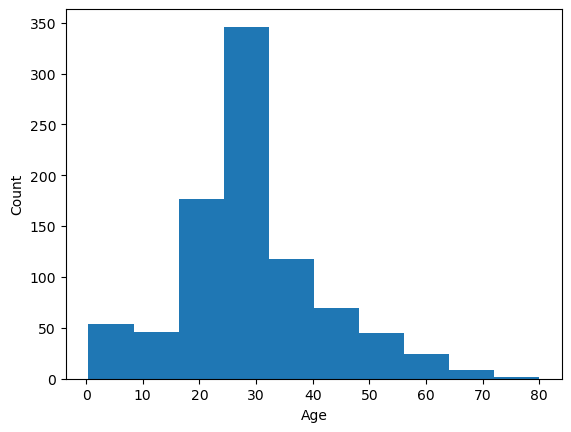

In [8]:
# b. Create a histogram of passenger ages, labeling the x-axis as "Age" and the y-axis as "Count."
fig, ax = plt.subplots()
ax.hist(df['Age'])
ax.set(xlabel='Age', ylabel='Count');

#### What is the age distribution of passengers on the Titanic?
The age distribution of Titanic passengers is right-skewed, with the majority of passengers in their late 20s to early 30s, as indicated by the peak in the histogram.
The distribution ranges from infants to elderly passengers, with a wide age range represented among the passengers.

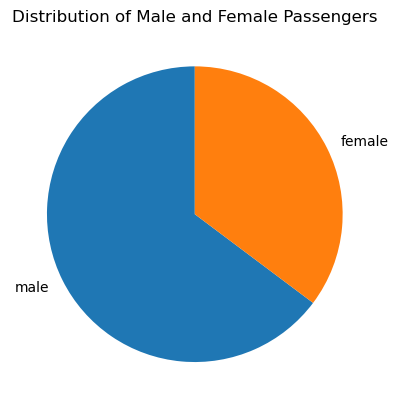

In [9]:
# c. Create a pie chart to show the distribution of male and female passengers.
gender_counts = df['Sex'].value_counts()
fig, ax = plt.subplots()
ax.pie(gender_counts, labels=gender_counts.index, startangle=90)
ax.set_title('Distribution of Male and Female Passengers');

#### What is the gender distribution among passengers?
The gender distribution shows that there were more male passengers than female passengers on the Titanic.

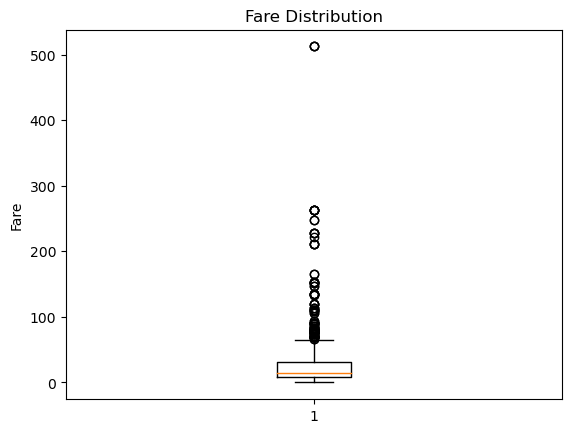

In [10]:
# d. Create a box plot for the fare to visualize its distribution.
fig, ax = plt.subplots()
ax.boxplot(df['Fare'])
ax.set(ylabel = 'Fare', title = 'Fare Distribution');

#### How does fare vary on the Titanic?
Fare distribution on the Titanic is highly skewed, with most passengers paying a low fare. A few outliers paid a very high fare, likely wealthy passengers traveling in first class.

# 3. Data Visualization with Seaborn:

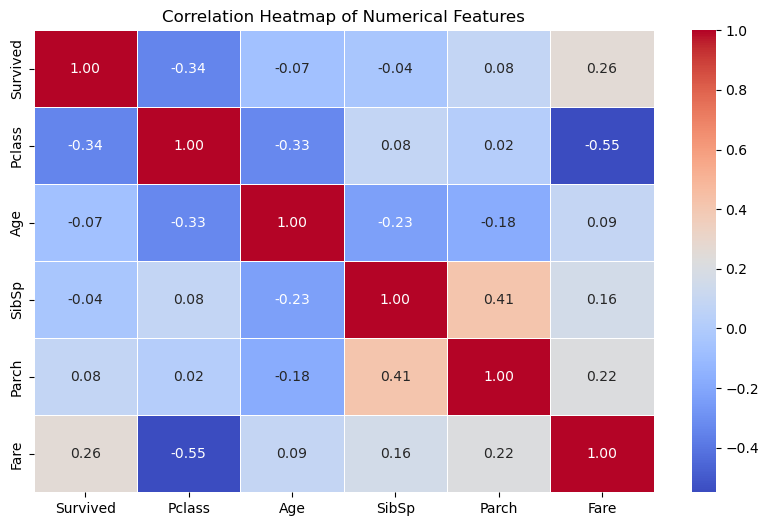

In [11]:
#a. Create a heatmap showing the correlation between different numerical features in the dataset. Annotate the heatmap with the correlation values.
num_features = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
corr_matrix = num_features.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(data=corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

#### Is there a correlation between different numerical features in the dataset?
There is a negative correlation between "Survived" and "Pclass" (-0.34), indicating that passengers in a higher class (lower Pclass values) had a higher likelihood of survival.

Age doesn't show a strong correlation with survival (-0.07). However, there might be a slight negative correlation, suggesting that younger passengers might have had a slightly better chance of survival.

There is no strong correlation between the number of siblings/spouses ("SibSp") and survival (-0.04).

Similarly, the number of parents/children ("Parch") on board doesn't show a strong correlation with survival (0.08).

The fare paid for the ticket ("Fare") exhibits a positive correlation with survival (0.26), suggesting that passengers who paid higher fares may have had a better chance of survival.

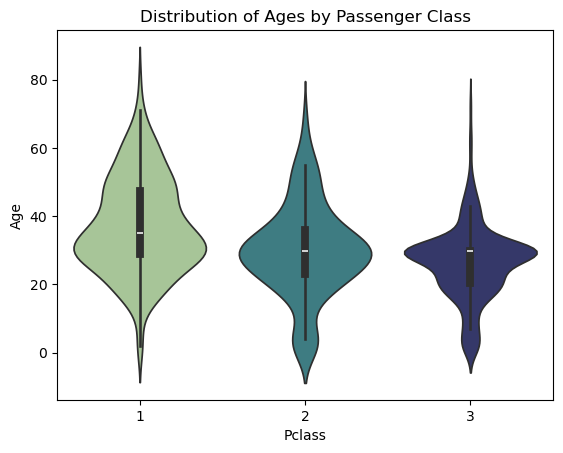

In [12]:
# b. Create a violin plot to visualize the distribution of ages by passenger class. Each violin plot should represent a different class.
sns.violinplot(data=df, x="Pclass", y="Age",palette='crest', legend=False, hue='Pclass')
plt.title('Distribution of Ages by Passenger Class');

#### How does age distribution vary by passenger class?
1st class passengers show a wide age distribution with some elderly passengers, as indicated by the broad and relatively higher violin plot, suggesting a mix of age groups in this class.

2nd class passengers have a moderately broad age range, with the violin plot showing a slightly younger median age (below 30), indicating a relatively even distribution across ages.

3rd class passengers appear to be predominantly young adults and children, with the violin plot displaying a peak in the lower age range, suggesting a concentration of younger passengers in this class.

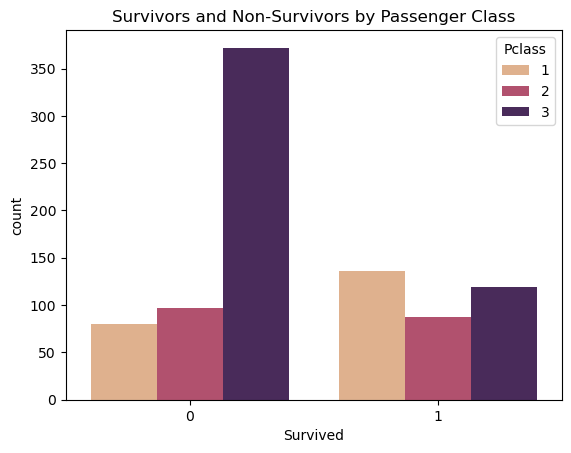

In [13]:
# c. Create a count plot to show the number of survivors and non-survivors, differentiating by passenger class. Use different colors for each class.
sns.countplot(data=df, x='Survived', hue='Pclass', palette='flare')
plt.title('Survivors and Non-Survivors by Passenger Class');

#### What is the survival rate for each passenger class?
The survival rate for each passenger class can be inferred based on the count plot as follows:

1st Class: Among 1st class passengers, a larger proportion survived compared to those who did not survive, indicating a relatively high survival rate for this class.

2nd Class: The count plot suggests that the survival rate for 2nd class passengers is moderate, with a noticeable number of both survivors and non-survivors.

3rd Class: 3rd class passengers appear to have a lower survival rate compared to the other classes, as indicated by a larger number of non-survivors and a relatively smaller number of survivors.

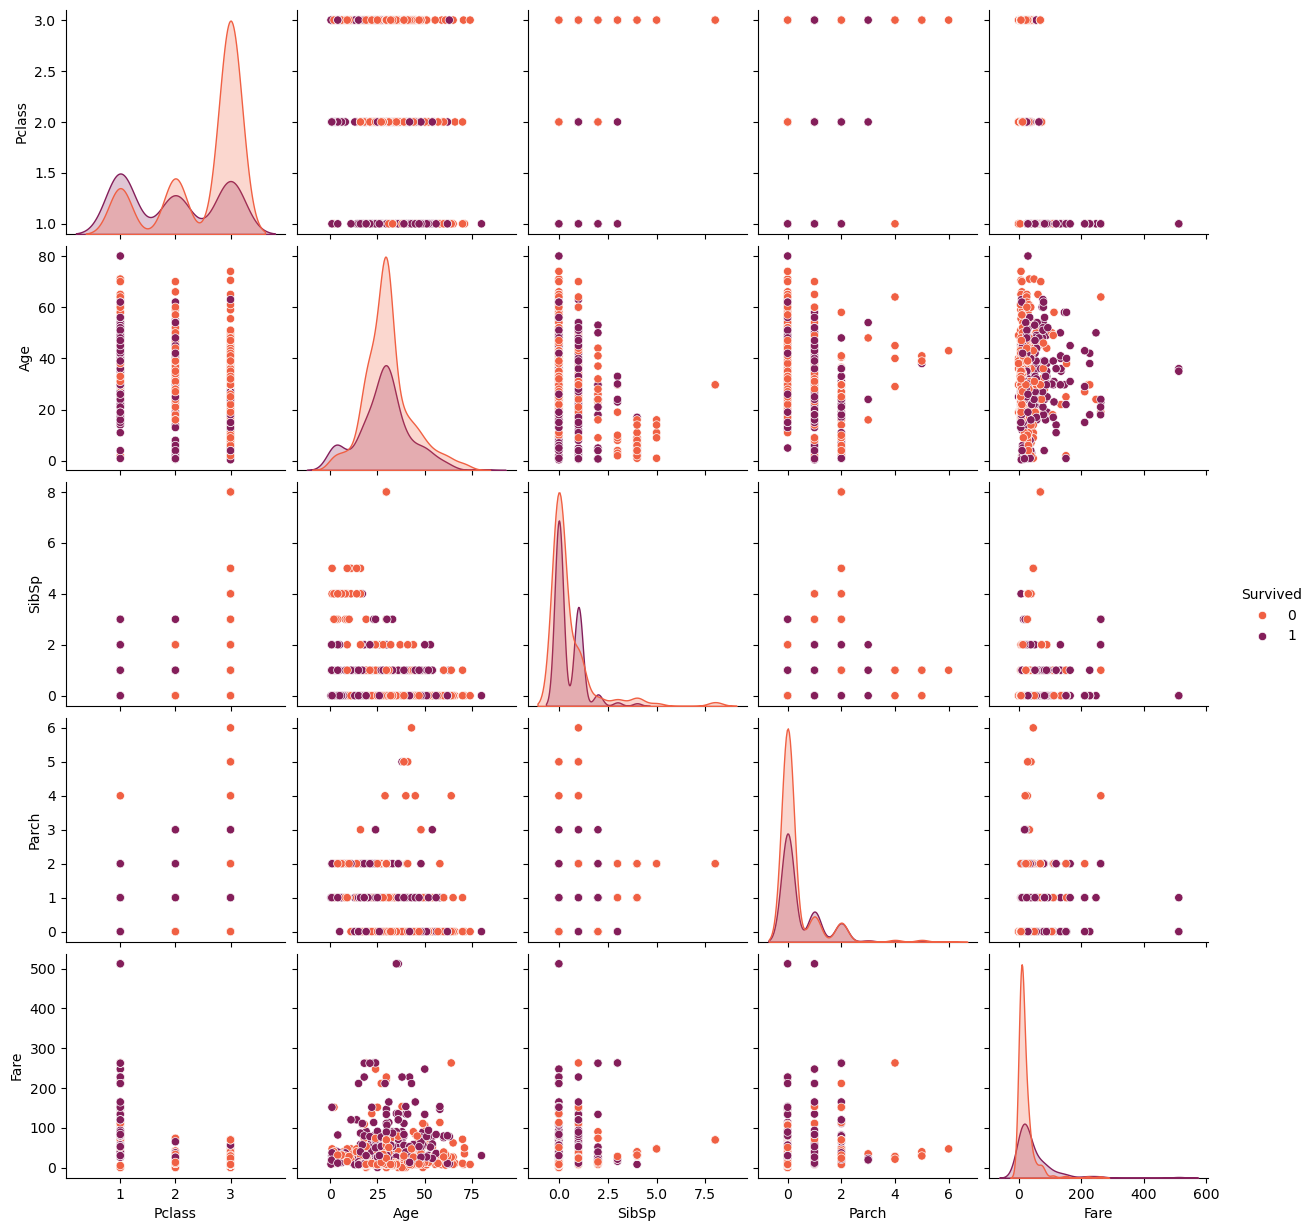

In [14]:
# d. Create a pair plot for numerical features to explore relationships between them.
sns.pairplot(num_features, hue='Survived', palette='rocket_r');

#### Are there any interesting relationships between numerical features in the dataset?

Pclass vs. Age and Fare: The pair plot also suggests that passenger class (Pclass) is associated with both age and fare. 1st class passengers tend to be older and paid higher fares, while 3rd class passengers are generally younger and paid lower fares.

Survival vs. Age: The pair plot indicates that there may be a slightly different age distribution between survivors and non-survivors. Survivors tend to have a wider age range, including both younger and older passengers.

Survival vs. Fare: There seems to be a relationship between fare paid and survival. Passengers who paid higher fares appear to have a better chance of survival.

SibSp and Parch: There isn't a clear and direct relationship between the number of siblings/spouses (SibSp) or parents/children (Parch) and survival based on the pair plot.